In [67]:
# Study partner is Nicole Lund.  Worked on Pseudo code together.
# The starter code and pseudo code for this challenge was provided and can be reviewed in  

# Cheat Sheet:  https://drive.google.com/file/d/1UHK8wtWbADvHKXFC937IS6MTnlSZC_zB/view

## Observations and Insights 

In [68]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata= pd.read_csv(mouse_metadata_path)
study_results= pd.read_csv(study_results_path)
df_combined_data=pd.merge(mouse_metadata,study_results)

df_combined_data



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [69]:
# Checking the number of mice.
# num_mice_combined = number of unique Mouse IDs
num_mice_combined=df_combined_data["Mouse ID"].nunique()
num_mice_combined


249

In [70]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
df_combined_clean=df_combined_data.drop_duplicates(subset=['Mouse ID', 'Timepoint'])

# Check the data for any mouse ID with duplicate time points and remove any data associated with that mouse ID
df_combined_clean

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary Statistics

In [72]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
df_regimen_group=df_combined_clean.groupby("Drug Regimen")

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
df_regimen_group_median=df_regimen_group['Tumor Volume (mm3)'].median()
df_regimen_group_mean=df_regimen_group['Tumor Volume (mm3)'].mean()
df_regimen_group_variance=df_regimen_group['Tumor Volume (mm3)'].var()
df_regimen_group_standard=df_regimen_group['Tumor Volume (mm3)'].std()
df_regimen_group_sem=df_regimen_group['Tumor Volume (mm3)'].sem()

df_regimen_group_median

### new DF of groupby "Drug Regimen"
df_stats_table=pd.DataFrame(
    {"Mean": df_regimen_group_mean,
    "Median": df_regimen_group_median,
    "Variance": df_regimen_group_variance,
    "Std Dev": df_regimen_group_standard,
    "SEM": df_regimen_group_sem})
    
df_stats_table


,Mean,Median,Variance,Std Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [73]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
df_stats_table_one_line=df_combined_clean.groupby("Drug Regimen")

# Using the aggregation method, produce the same summary statistics in a single line
df_stats_table_one_line.agg({"Tumor Volume (mm3)": ["mean", "median","var","std","sem"]})

#Combined two (chaining)
df_stats_table_favorite_one_line=df_combined_clean.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ["mean", "median","var","std","sem"]})

df_stats_table_favorite_one_line

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [138]:
df_combined_clean


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


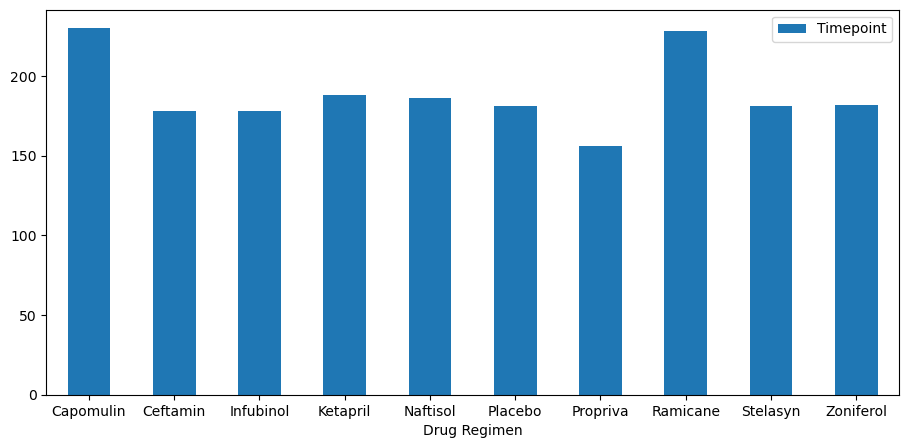

In [130]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
#value counts of drug regimen
df_measurement_count=df_combined_clean.groupby("Drug Regimen").count().reset_index()
df_measurement_plot=df_measurement_count.plot.bar(x='Drug Regimen',y='Timepoint',rot=0,figsize=(11,5))
plt.show()

#df_measurement_count



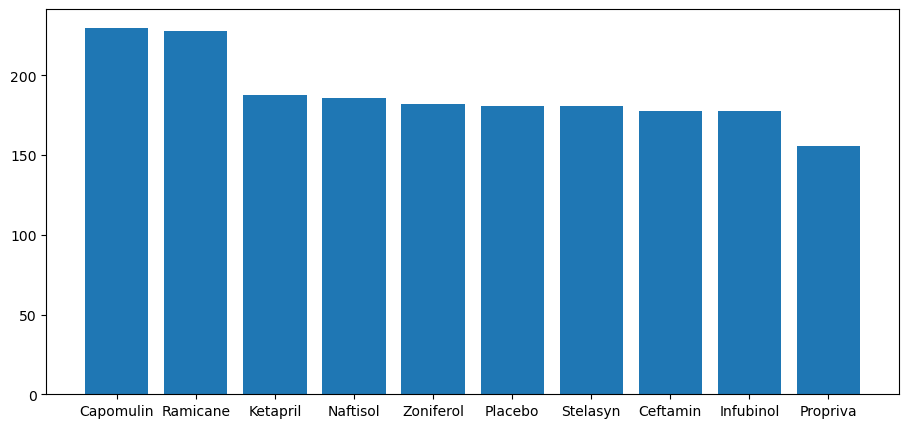

In [76]:
# # Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
drug_regimen_count=df_combined_clean['Drug Regimen'].value_counts().to_list()
drug_regimen=df_combined_clean['Drug Regimen'].value_counts().index.to_list()

# # Create an array & datasets
Regimen=["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"]

# #Plotting
# for x in x_axis:
#     tick_drug.append(x)
# plt.title("Number of Measurement")
# plt.ylabel("Timepoint")
# plt.xlabel("Regimen")
ax=plt.subplots(figsize=(11,5))

plt.bar(drug_regimen,drug_regimen_count)
plt.show()


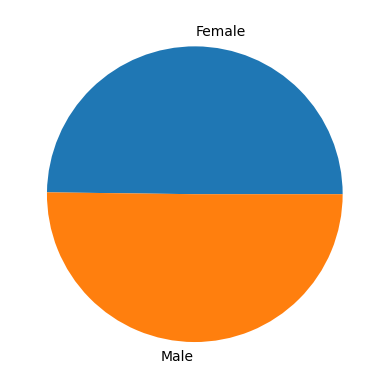

In [133]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

#data
df_mice_gender=df_combined_clean.groupby(['Sex'])['Mouse ID'].nunique()
df_mice_gender.plot.pie(y='Mouse ID')
plt.ylabel("")



#Formatting
# Title
plt.show()

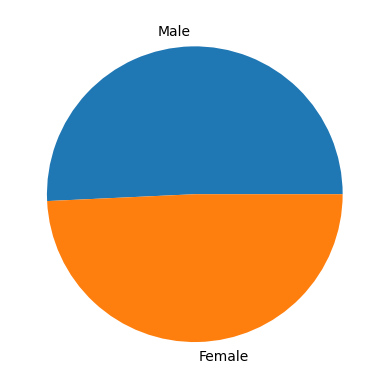

In [132]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mice_gender_count=df_combined_clean['Sex'].value_counts().to_list()
plt.pie(mice_gender_count, labels=['Male','Female'])


#Formatting
# plt.title("Gender of Mice")
plt.show()


## Quartiles, Outliers and Boxplots

In [89]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  Capomulin, Ramicane, Infubinol, and Ceftamin

# four_regimens=['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']
df_four_regimens=df_combined_clean.loc[df_combined_clean['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol','Ceftamin'])]

# Start by getting the last (greatest) timepoint for each mouse
df_four_regimens=df_four_regimens.groupby("Mouse ID").max()
df_four_regimens

## Merge this group df with the original dataframe to get the tumor volume at the last timepoint
##reference, https://stackoverflow.com/questions/53747080/broadcast-groupby-result-as-new-column-in-original-dataframe
#pd.merge on two columns


,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
a203,Infubinol,Female,20,23,45,67.973419,2
a251,Infubinol,Female,21,25,45,65.525743,1
a275,Ceftamin,Female,20,28,45,62.999356,3
a411,Ramicane,Male,3,22,45,45.466677,1
a444,Ramicane,Female,10,25,45,45.000000,0
...,...,...,...,...,...,...,...
y769,Ceftamin,Female,6,27,45,68.594745,4
y793,Capomulin,Male,17,17,45,45.000000,2
y865,Ceftamin,Male,23,26,45,64.729837,3


In [154]:
# Put treatments into a list for for loop (and later for plot labels)
#take drug regimen column, to become list
four_regimens=['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
#formula for IQR; subtract 25 percentile from 75 percentile
for regimen in four_regimens:
    df_tumor_volume=df_four_regimens.loc[df_four_regimens['Drug Regimen']==regimen, 'Tumor Volume (mm3)']
    tumor_volume.append(df_tumor_volume)
    # Locate the rows which contain mice on each drug and get the tumor volumes
    #already have this data
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds; refer to lesson plan 6.3; isolate outlier
    print(df_tumor_volume.quantile([.25,.5,.75]))



0.25    45.000000
0.50    45.893720
0.75    46.749006
Name: Tumor Volume (mm3), dtype: float64
0.25    45.000000
0.50    45.521875
0.75    46.343832
Name: Tumor Volume (mm3), dtype: float64
0.25    54.048608
0.50    60.165180
0.75    65.525743
Name: Tumor Volume (mm3), dtype: float64
0.25    48.722078
0.50    59.851956
0.75    64.299830
Name: Tumor Volume (mm3), dtype: float64


In [81]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#create df with regimen, id, and tumor volume at each range (use pivot function in pd); cheat sheet or use a nested list at the same time as creating the plot outliers


## Line and Scatter Plots

In [150]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#use df_combined_clean, reference regimen column, variable is Capomulin

# ax=plt.Capomulin()
# df_combined_clean.plot(kind='Tumor Volume',x='Timepoint',ax='Capomulin')
# plt.show()
# df_combined_clean.set_index('Timepoint').plot()

#https://datascience.stackexchange.com/questions/25596/how-to-plot-two-columns-of-single-dataframe-on-y-axis
# import seaborn as sns
# df_capomulin_mice=df_combined_clean("Capomulin",var_name="Tumor Volume", value_name="Timepoint")
# sns.relplot(data=df_combined_clean, x="Tumor Volume", y="Timepoint",kind="Capomulin")
# height=40, aspect=.5 
# df_capomulin_regimen=df_four_regimens.groupby("Capomulin")
# df_combined_clean.plot.line("Tumor Volume (mm3)","Timepoint")
# df_combined_clean.set_index("Capomulin").plot()
# df_combined_clean

#https://www.geeksforgeeks.org/time-series-plot-or-line-plot-with-pandas/
# df_capomulin_regimen=df_regimen_group.groupby(["Capomulin"]).count
# df_capomulin_regimen.plot(x="Timepoint", y="Tumor Volume (mm3)")
# df_capomulin_regimen

#select one mouse(s185) and pull out timepoint and tumor data (two columns); pull out a df by using the loc command and conditional statement in rows.  Not necessary to use groupby.  Create pd scatterplot after
df_mouse_s185=df_combined_clean.loc[df_combined_clean("Tumor Volume (mm3)","Timepoint")]
df_mouse_s185=df_mouse_s185.loc[df_combined_clean['Mouse ID']=='s185']=True

# plt.show()

df_mouse_s185=df_combined_clean.loc['Mouse ID', "Tumor Volume (mm3)"]
plt.show()


TypeError: 'DataFrame' object is not callable

In [83]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [84]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
